# Linear Tree Classifier

Let's take a quick look at how these models work and compare them with decision tree classifiers

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lineartree import LinearTreeClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

First of all, let's generate a random sample for doing a simple example

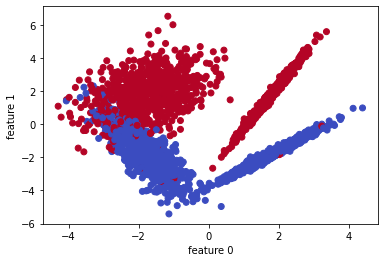

In [59]:
X, y = make_classification(n_samples=3000, n_features=2, n_classes=2, 
                           n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=89263, class_sep=1.8)
plt.figure()
plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=y)
plt.xlabel('feature 0'); plt.ylabel('feature 1')
plt.show()

In [3]:
col_names = ['Feature_0', 'Feature_1']
df = pd.DataFrame(X, columns=col_names)

Now, we create our linear tree and we fit it

In [4]:
lt = LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=2)

In [5]:
lt.fit(X,y);

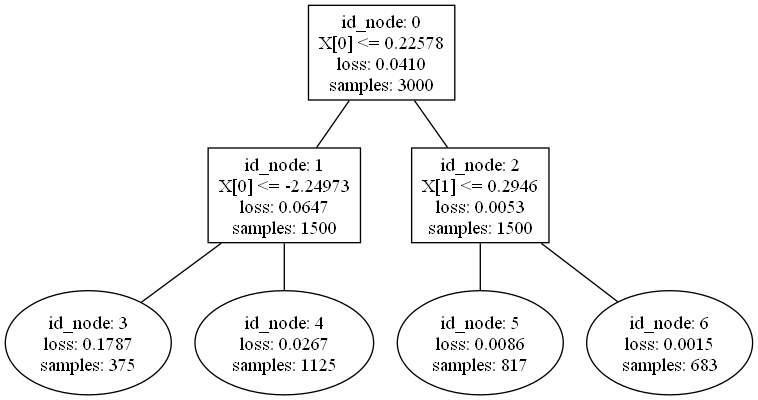

In [6]:
lt.plot_model()

The way it works is exactly the same as traditional trees, the only difference is in the leaves.
Look the decision surface that generates:

<Figure size 864x432 with 0 Axes>

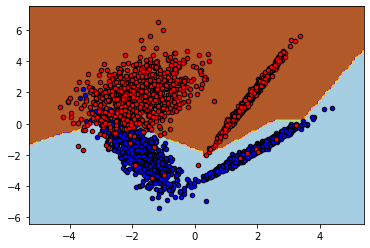

In [35]:
plt.figure(figsize=(12,6))
DecisionBoundaryDisplay.from_estimator(lt, X, response_method='predict',cmap=plt.cm.Paired)
colors = "br"
for i, color in zip(lt.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20)

Of course, we can get the information of the logistic models fitted in the leaves:

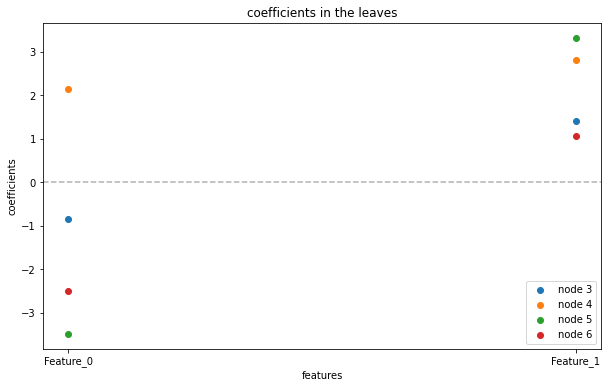

In [15]:
leaves = lt.summary(only_leaves=True)

plt.figure(figsize=(10,6))
for m,(i,l) in enumerate(leaves.items()):
    plt.scatter(range(df.shape[1]), l['models'].coef_, label="node {}".format(i))

plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.title('coefficients in the leaves')
plt.xticks(range(df.shape[1]), df.columns)
plt.ylabel('coefficients'); plt.xlabel('features')
plt.legend()
plt.show()

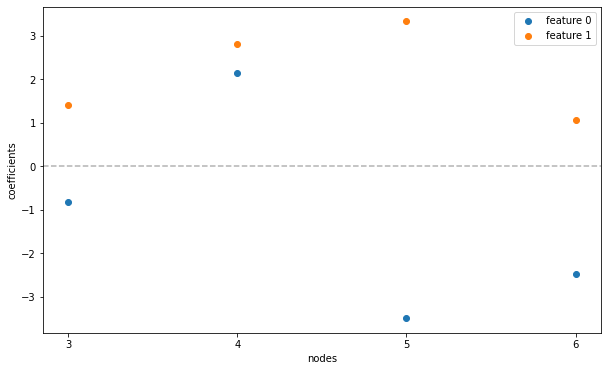

In [9]:
leaves = lt.summary(only_leaves=True)
x_values = list(leaves.keys())
coefs_values = []
coef = []
for i in range(df.shape[1]):
    for el in leaves.values():
        coef += [el['models'].coef_[0][i]]
    coefs_values.append(coef)
    coef = []
    
plt.figure(figsize=(10,6))
for i in range(len(coefs_values)):
    plt.scatter(x_values, coefs_values[i], label='feature {}'.format(i))
plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.ylabel('coefficients')
plt.xlabel('nodes')
plt.legend()
plt.xticks(x_values)
plt.show()

By studying these kind of plots, we can obtain very relevant information from the data about which features are more important. Also for doing some exploratory analysis could be useful.

Now let's compare the decision surfaces at various depths of the linear trees against the decision trees

In [118]:
tree1 = LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=1).fit(X, y)
tree2 = DecisionTreeClassifier(max_depth=1).fit(X, y)
tree3 = LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=2).fit(X, y)
tree4 = DecisionTreeClassifier(max_depth=2).fit(X, y)

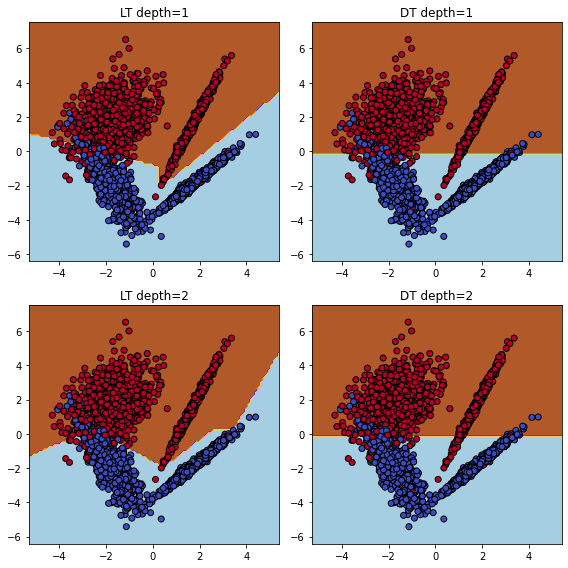

In [120]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    
display1 = DecisionBoundaryDisplay.from_estimator(tree1, X, response_method='predict', cmap=plt.cm.Paired, ax=axs[0, 0])
axs[0, 0].set_title('LT depth=1')
display2 = DecisionBoundaryDisplay.from_estimator(tree2, X, response_method='predict', cmap=plt.cm.Paired, ax=axs[0, 1])
axs[0, 1].set_title('DT depth=1')
display3 = DecisionBoundaryDisplay.from_estimator(tree3, X, response_method='predict', cmap=plt.cm.Paired, ax=axs[1, 0])
axs[1, 0].set_title('LT depth=2')
display4 = DecisionBoundaryDisplay.from_estimator(tree4, X, response_method='predict', cmap=plt.cm.Paired, ax=axs[1, 1])
axs[1, 1].set_title('DT depth=2')

for ax in axs.flatten():
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    
plt.tight_layout()
plt.show()